# 네이버 지식인-남친 선물 검색

In [4]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus']=False
mpl.rcParams['font.family']='NanumBarunGothic'

In [3]:
# konlpy 설치
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 36.0 MB/s eta 0:00:00


In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver

In [6]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from tqdm import tqdm
from urllib.parse import quote

In [7]:
base_url='https://kin.naver.com/search/list.naver?query='
url=base_url+quote('남친선물')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options)
driver.get(url)

<ipython-input-7-a90f762be8ee>:7: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options)


In [9]:
answer_list=[]
for page in range(1,11):
    print('page', page)
    url=f"{base_url}{quote('남친선물')}&page={page}"
    driver.get(url)
    time.sleep(2)

    html=driver.page_source
    soup=BeautifulSoup(html, 'html.parser')
    lis=soup.select('ul.basic1 > li')

    for li in lis:
        sub_url=li.select_one('a._searchListTitleAnchor')['href']
        driver.get(sub_url)
        time.sleep(2)

        count=int(driver.find_element(By.CSS_SELECTOR, '._answerCount.num').text)
        answer_page=(count-1)//5

        for i in range(answer_page):
            driver.find_element(By.ID, 'nextPageButton').click()
            time.sleep(2)

        html=driver.page_source
        soup=BeautifulSoup(html, 'html.parser')
        divs=soup.select('div.answer-content__item._contentWrap._answer')

        for div in divs:
            ps=div.select('p.se-text-paragraph')
            for p in ps:
                text=p.get_text()
                if text==' ' or text=='\u200b':
                    continue
                answer_list.append(text)
        driver.back()
        time.sleep(2)

page 1
page 2
page 3
page 4
page 5
page 6
page 7
page 8
page 9
page 10


In [10]:
len(answer_list)

3826

In [13]:
driver.close()

In [11]:
with open('new_gift.txt','w', encoding='utf-8') as fp:
    for answer in answer_list:
        fp.write(answer+'\n')

# 남친 선물 WC

In [16]:
from konlpy.tag import Okt, Kkma, Komoran
okt=Okt()

In [14]:
with open('new_gift.txt') as file:
    text=file.read()

In [18]:
# 명사만 추출
tokens=okt.nouns(text)

In [19]:
tokens[100:150]

['스',
 '수수료',
 '수',
 '진심',
 '다해',
 '추천',
 '점',
 '꼭',
 '참고',
 '질문',
 '님',
 '수수료',
 '무관',
 '도움',
 '채택',
 '남친',
 '차',
 '구입',
 '선물',
 '고민',
 '스윗',
 '여자친구',
 '제',
 '차',
 '운전',
 '소모품',
 '생각',
 '것',
 '가지',
 '차량',
 '방향',
 '제',
 '필수',
 '블랙',
 '체리',
 '향',
 '취향',
 '안타',
 '무난',
 '향',
 '랍',
 '기본',
 '스마트',
 '키',
 '포인트',
 '주기',
 '가죽',
 '키링',
 '또',
 '차량']

In [20]:
# 영문자, 숫자, 부호제거
import re
tokens=[re.sub('[^가-히]','',token) for token in tokens]

In [21]:
import nltk
nltk.download('punkt') # 코랩에서는 매번 다운로드함 / 로컬에선 한번만 다운로드

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

* 불용어 정리

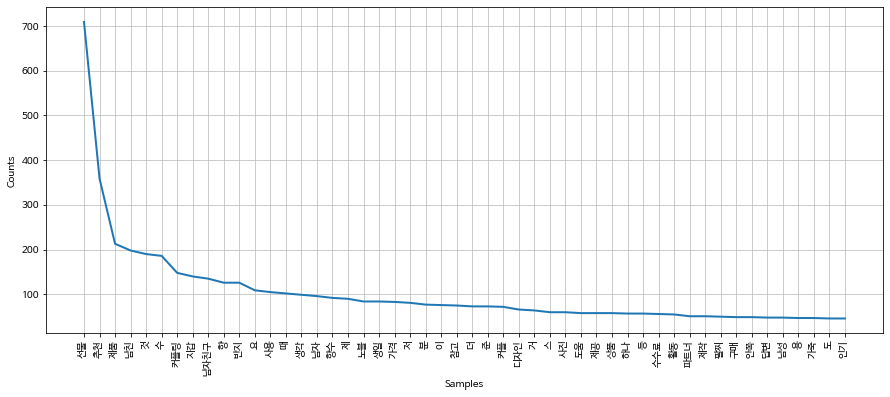

In [22]:
gift=nltk.Text(tokens, name='남친선물')
plt.figure(figsize=(15,6))
gift.plot(50)
plt.show()

In [72]:
stoptext='''
    선물 추천 남친 것 수 제품 향 요 사용 때 생각 남자 제 생일 가격 저 분 이 참고 더 준 커플 디자인
    거 스 도움 제공 상품 하나 등 수수료 활동 파트너 제작 구매 안쪽 답변 남성 용 가죽 도 인기
    남자친구 노블 가지 한번 마음 가요 무조건 수납 채택 의미 천연 부담 쿠팡 질문 구성 피 포장 
    고민 직접 곳 날 정액 모두 링크 비 포인트 요즘 선택 소재 공간 정도 링 가장 아래 친구
    디 퓨저 통해 사실 가성 사람 가능 일환 정보 파혼 클 정성 시간 실용 개 브랜드 후기 가미
    그 후시 향기 나 제대로 온라인 하루 재질 괌 느낌 중 포스팅 규어 걸 티 탈취 보통 요소
    때문 심플 꼭 아이템 안 위 배송 로고 여자 용어 추가 블렌딩 정말 짐 판매 블랙 조금 세상
    더욱 그냥 순 용품 말 고급 협찬 컬러 할인 사면 은 글 좀 겨울 여자친구 일단 돈 물건 부문
    검색 네이버 감동 기본 이용 이면 자체 취미 단 다른 무난 군인 센스 국내 인터넷 모양 생김새
    대한 칭찬 준비 출고 방향 캐릭터 과 달달 함 차안 머리 맘 부모님 덮개 지인 분도 쪽 활짝 꽉
'''

In [73]:
stop_words=stoptext.split()
tokens=[token for token in tokens if token not in stop_words]

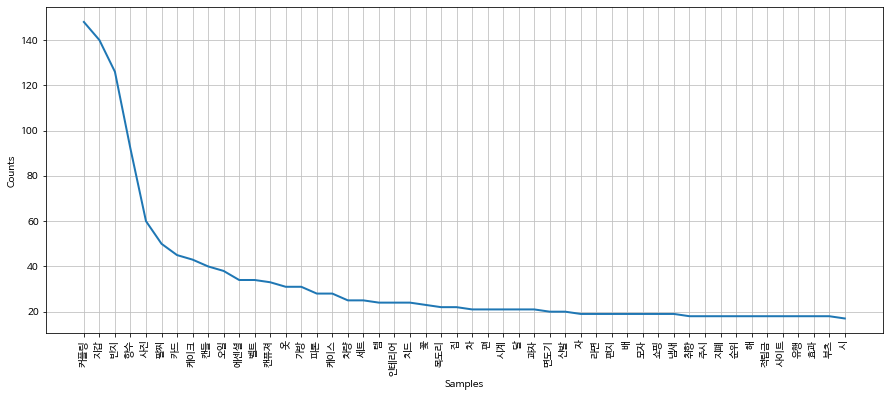

In [74]:
gift=nltk.Text(tokens, name='남친선물')
plt.figure(figsize=(15,6))
gift.plot(50)
plt.show()

In [75]:
tokens[:10]

['차', '차량', '체리', '게', '상자', '약간', '세기', '조절', '평상시', '거의']

# 워드클라우드 그리기

In [76]:
from wordcloud import WordCloud
from PIL import Image

In [77]:
data=gift.vocab().most_common(300)
font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

In [78]:
wc=WordCloud(font_path=font_path, relative_scaling=0.2,
             background_color='white').generate_from_frequencies(dict(data))

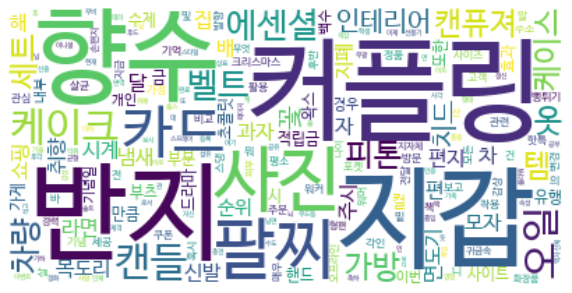

In [79]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

* 하트 그림 위에 표시

In [50]:
mask=np.array(Image.open('heart.jpg'))

In [51]:
from wordcloud import ImageColorGenerator
image_colors=ImageColorGenerator(mask)

In [80]:
wc=WordCloud(font_path=font_path, relative_scaling=0.2,
             background_color='white',
             mask=mask,
             min_font_size=1,
             max_font_size=120
             ).generate_from_frequencies(dict(data))

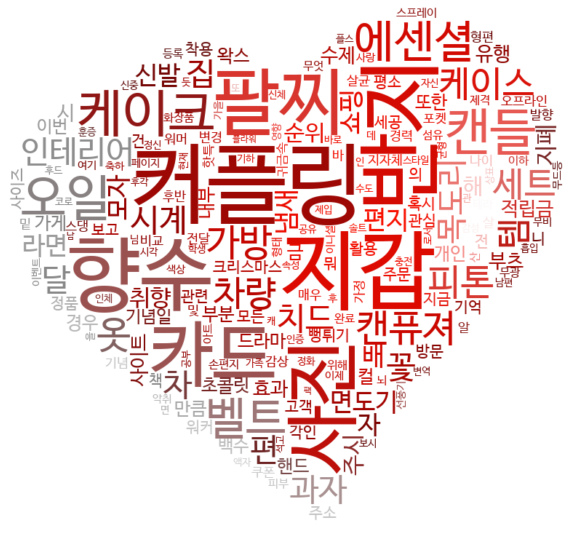

In [81]:
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()